# What are the most demanded skills for the top 3 most popular data roles?

## Methodology

1. Clean up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [53]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [54]:
df_PT = df[df['job_country'] == 'Portugal']

In [55]:
df_skills = df_PT.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
344,Data Analyst,sql
344,Data Analyst,excel
398,Software Engineer,python
398,Software Engineer,sql
398,Software Engineer,gcp
...,...,...
785585,Platform Engineer,c#
785585,Platform Engineer,azure
785617,Data Analyst,sql
785617,Data Analyst,excel


In [56]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,11
1,airflow,Cloud Engineer,2
2,airflow,Data Analyst,56
3,airflow,Data Engineer,539
4,airflow,Data Scientist,81
...,...,...,...
1277,zoom,Machine Learning Engineer,4
1278,zoom,Senior Data Analyst,2
1279,zoom,Senior Data Engineer,1
1280,zoom,Senior Data Scientist,1


In [57]:
# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1062,sql,Data Analyst,1945
1063,sql,Data Engineer,1876
826,python,Data Engineer,1824
827,python,Data Scientist,1721
825,python,Data Analyst,1259
...,...,...,...
423,haskell,Data Analyst,1
424,haskell,Data Scientist,1
1240,vue.js,Software Engineer,1
1242,watson,Cloud Engineer,1


In [58]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

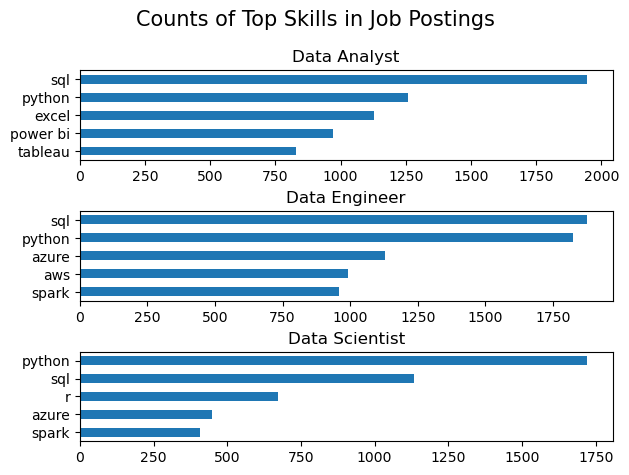

In [59]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()

In [60]:
df_job_title_count = df_PT['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,3987
1,Data Engineer,3258
2,Data Scientist,2881
3,Business Analyst,1039
4,Software Engineer,804
5,Senior Data Engineer,646
6,Senior Data Scientist,627
7,Senior Data Analyst,535
8,Machine Learning Engineer,434
9,Cloud Engineer,297


In [61]:
df_skills_count

,job_skills,job_title_short,skill_count
1062,sql,Data Analyst,1945
1063,sql,Data Engineer,1876
826,python,Data Engineer,1824
827,python,Data Scientist,1721
825,python,Data Analyst,1259
...,...,...,...
423,haskell,Data Analyst,1
424,haskell,Data Scientist,1
1240,vue.js,Software Engineer,1
1242,watson,Cloud Engineer,1


In [62]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_perc'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,sql,Data Analyst,1945,3987,48.783547
1,sql,Data Engineer,1876,3258,57.581338
2,python,Data Engineer,1824,3258,55.985267
3,python,Data Scientist,1721,2881,59.736203
4,python,Data Analyst,1259,3987,31.577627
...,...,...,...,...,...
1277,haskell,Data Analyst,1,3987,0.025082
1278,haskell,Data Scientist,1,2881,0.034710
1279,vue.js,Software Engineer,1,804,0.124378
1280,watson,Cloud Engineer,1,297,0.336700


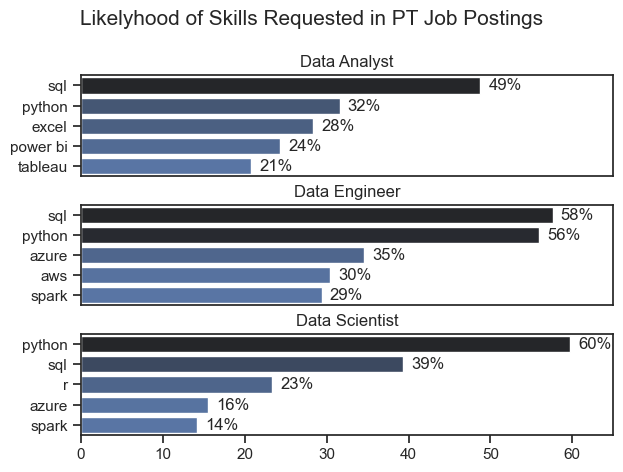

In [78]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 65)

    for n, v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelyhood of Skills Requested in PT Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()